In [3]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
import statsmodels.formula.api as smf
from pandas import *

In [15]:
# Load the excel data using pandas into a data frame with a reference to sheet name
xl_file = pd.read_excel(open('data/BostonHousing.xlsx','rb'), sheetname='Data')
xl_file.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [16]:
# In this stage we want to normalize our full data set down to the predictors only
# Setup a key map of all the predictor data we are processing
predictor_data = {}
predictor_data["CRIM"] = xl_file["CRIM"].tolist()
predictor_data["CHAS"] = xl_file["CHAS"].tolist()
predictor_data["RM"] = xl_file["RM"].tolist()
predictor_data["MEDV"] = xl_file["MEDV"].tolist()

# Create a new data frame with just the predictor data and CRIM, CHAS, RM, MEDV set as our column names
df = pd.DataFrame(predictor_data, columns=["CRIM", "CHAS", "RM", "MEDV"])
df.head()

,CRIM,CHAS,RM,MEDV
0,0.00632,0,6.575,24.0
1,0.02731,0,6.421,21.6
2,0.02729,0,7.185,34.7
3,0.03237,0,6.998,33.4
4,0.06905,0,7.147,36.2


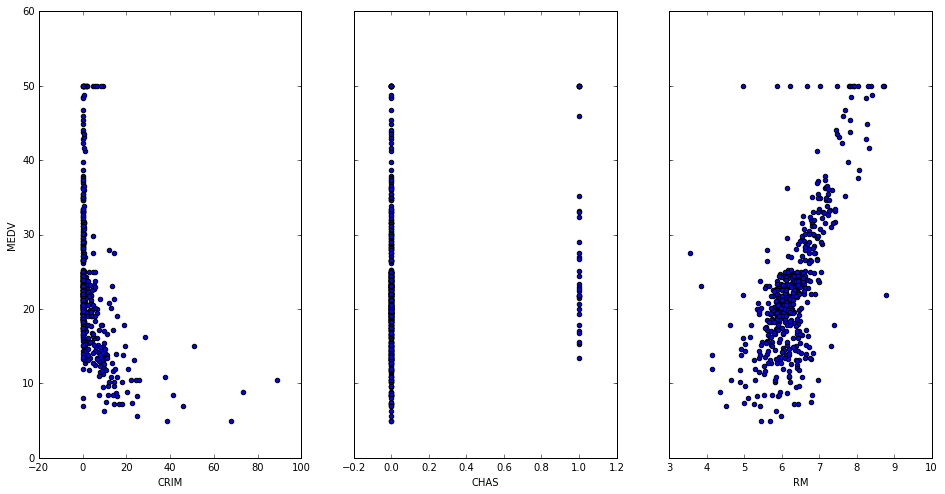

In [13]:
# Direct reference Kevin Markham
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='CRIM', y='MEDV', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='CHAS', y='MEDV', ax=axs[1])
df.plot(kind='scatter', x='RM', y='MEDV', ax=axs[2])

In [23]:
# y = B(0) + B(1) * CRIM + B(2) * CHAS + B(3) * RM

# create a fitted model with all three predictors
linear_regression_model = smf.ols(formula='MEDV ~ CRIM + CHAS + RM', data=df).fit()

# print the coefficients
linear_regression_model.params

Intercept   -28.810683
CRIM         -0.260724
CHAS          3.763037
RM            8.278180
dtype: float64

In [24]:
# Adding in the coefficients to the equation
# y = B(0) + B(1) * -0.260724 + B(2) * 3.763037 + B(3) * 8.278180 

# Upper and lower bound values of each column
X_new = pd.DataFrame({'CRIM': [df.CRIM.min(), df.CRIM.max()], 'CHAS': [df.CHAS.min(), df.CHAS.max()], 'RM': [df.RM.min(), df.RM.max()]})
X_new

,CHAS,CRIM,RM
0,0,0.00632,3.561
1,1,88.97620,8.780


In [26]:
# Here is the median of MEDV
l = xl_file["MEDV"].tolist()
median_medv = np.median(l)
median_medv

21.199999999999999

In [27]:
# The chart that is relevant to the observation of this data is the middle chart
# Here is a brief summary of that information

# 1) Average number of rooms in a dwelling (RM) is affecting the median housing price more than any other
# 2) The Charles River Dummy Variable is next highest, but no where near as high of an impact of rooms 
# 3) The Crime Rate (CRIM) is negatively affecting the median housing value, but not as much as I thought

# In conclusion the rooms are greatly affecting the median in a positive way and the crime is affecting in a negative way
# This can be visualized via the scatter plots above
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     206.7
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           2.73e-87
Time:                        23:01:31   Log-Likelihood:                -1636.7
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     502   BIC:                             3298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -28.8107      2.563    -11.240      0.000       -33.847   -23.775
CRIM          -0.2607      0.033     -7.964      0.000        -0.325    -0.196
CHAS           3.7630      1.086      3.464      0.001         1.629     5.897
RM             8.2782      0.402     20.602      0.000         7.489     9.068
==============================================================================
Omnibus:                      157.437   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.666
Skew:                           1.216   Prob(JB):                    7.38e-206
Kurtosis:                       9.236   Cond. No.                         92.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""